# ROC 예제


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [2]:
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


In [3]:
y_pred = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(y_pred))
y_pred.count(1), y_pred.count(0)

20


(8, 12)

In [5]:
y_test=[1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]
y_test.count(1), y_test.count(0)

(10, 10)

In [6]:
confusion_matrix(y_test, y_pred)

array([[8, 2],
       [4, 6]])

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.75      0.60      0.67        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



In [8]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), columns=['score','predict','real'])
result['correct'] = (result.predict == result.real)
result.head(10)

,score,predict,real,correct
0,99.0,1,1,True
1,96.9,1,1,True
2,94.9,1,0,False
3,92.8,1,1,True
4,90.8,1,0,False
5,88.7,1,1,True
6,86.7,1,1,True
7,84.6,1,1,True
8,82.6,0,0,True
9,80.5,0,0,True


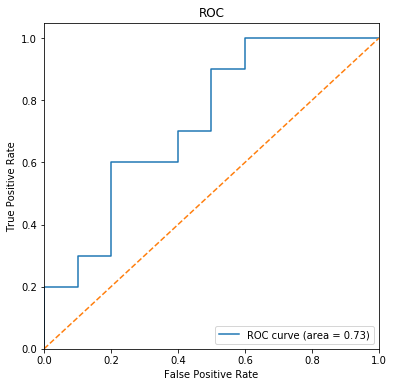

In [12]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# 분류 알고리즘 성능 비교
## 포도주 품질 예측하기

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [37]:
!curl -L https://goo.gl/Gyc8K7 -o ./winequality-red.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   98k  100   98k    0     0  85334      0  0:00:01  0:00:01 --:--:-- 85334


In [38]:
wine = pd.read_csv('winequality-red.csv')
print(wine.shape)
wine.head(5)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
my_bins = (2.5, 6.5, 8.5)
groups = [0,1]
wine['qual'] = pd.cut(wine['quality'], bins = my_bins, labels = groups)

In [41]:
wine['qual'].value_counts()

0    1382
1     217
Name: qual, dtype: int64

In [42]:
X = wine.drop(['quality','qual'], axis = 1)
y = wine['qual']

y.value_counts()

0    1382
1     217
Name: qual, dtype: int64

In [0]:
# 표준 스케일링
sc = StandardScaler()
X = sc.fit_transform(X)

np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [44]:
# 선형분류
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.81875

In [45]:
# 결정트리
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.871875

In [46]:
# 랜덤 포레스트
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.91875

In [47]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.878125

In [48]:
# 로지스틱 회귀
log = LogisticRegression()
log.fit(X_train, y_train)
log.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.871875

### 혼돈 매트릭스

In [49]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[253,  16],
       [ 42,   9]])

## ROC 곡선

In [0]:
# 선형분류
y_score = sgd.decision_function(X_test)

In [0]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
y_score = classifier.fit(X_train, y_train).predict(X_test)

In [61]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), columns = ['score', 'predict','real'])
result['correct'] = (result.predict == result.real)
result.head()

,score,predict,real,correct
0,0.792591,1,0,False
1,-2.957136,0,0,True
2,-5.740148,0,0,True
3,-1.215177,0,0,True
4,-5.880221,0,0,True


In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

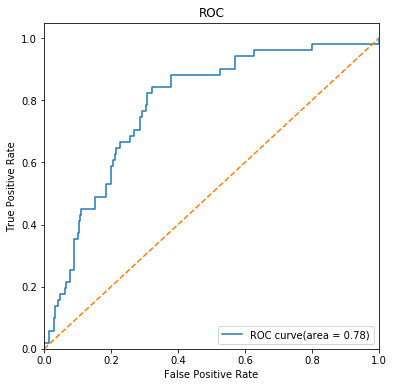

In [63]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label = 'ROC curve(area = %0.2f)' %roc_auc)
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")